In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(".\CareerMapping1.csv")

In [3]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
y = data.pop("Role")

In [5]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

In [6]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [7]:
y_train_encoded

array([ 6,  6,  6, ..., 13,  8,  9])

In [8]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [9]:
x_test

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
8176,4.0,4.0,4.0,4.0,0.756185,0.390057,0.178010,0.045790,0.603401,0.076721,0.248604,0.163950,0.297422,0.236439
2197,4.0,5.0,4.0,4.0,0.679632,0.461463,0.377782,0.093101,0.603731,0.106208,0.375550,0.167429,0.381982,0.198991
3089,3.0,3.0,3.0,3.0,0.709629,0.279900,0.140491,0.029666,0.644549,0.079564,0.379500,0.153742,0.352686,0.236323
3596,2.0,6.0,2.0,2.0,0.685635,0.427472,0.337034,0.207072,0.604966,0.103457,0.362245,0.141477,0.274069,0.276472
4829,4.0,4.0,2.0,4.0,0.746404,0.545886,0.573169,0.333671,0.580038,0.138793,0.371876,0.138241,0.226960,0.260803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,0.0,1.0,1.0,1.0,0.770309,0.437685,0.464425,0.165100,0.548227,0.051897,0.451636,0.104828,0.237958,0.191238
5483,5.0,5.0,5.0,2.0,0.769106,0.367987,0.410118,0.068777,0.649124,0.045418,0.364199,0.110347,0.270342,0.182944
1913,4.0,4.0,4.0,4.0,0.883756,0.628363,0.674396,0.232913,0.688105,0.042994,0.341551,0.088947,0.198435,0.112760
7414,2.0,2.0,2.0,6.0,0.563646,0.517680,0.622166,0.367558,0.707612,0.211483,0.353711,0.234374,0.324588,0.264611


In [10]:
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = svm.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(train_accuracy)
print(val_accuracy)

0.3314993122420908
0.30844793713163066


In [11]:
svm = SVC(kernel='poly', C=1.0, random_state=42)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = svm.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(train_accuracy)
print(val_accuracy)

0.3969345647474946
0.3698428290766208


In [12]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = svm.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(train_accuracy)
print(val_accuracy)

0.5112988799371193
0.47789783889980353


In [15]:
c = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
for i in c:
    svm = SVC(kernel='linear', C=i, random_state=42)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = svm.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for C {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for C 1.0 is 0.5112988799371193 and 0.47789783889980353
 Train accuracy and Val accuracy for C 2.0 is 0.5280015720180782 and 0.5019646365422397
 Train accuracy and Val accuracy for C 3.0 is 0.5319316172135979 and 0.5024557956777996
 Train accuracy and Val accuracy for C 4.0 is 0.5458832776576931 and 0.5117878192534381
 Train accuracy and Val accuracy for C 5.0 is 0.5574769109844763 and 0.5196463654223968
 Train accuracy and Val accuracy for C 6.0 is 0.5533503635291805 and 0.5176817288801572
 Train accuracy and Val accuracy for C 7.0 is 0.5555118883867165 and 0.5171905697445972


In [14]:
c = [10.0, 11.0, 12.0, 14.0, 15.0, 16.0, 17.0]
for i in c:
    svm = SVC(kernel='rbf', C=i, random_state=42)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = svm.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for C {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for C 10.0 is 0.50049125564944 and 0.4430255402750491
 Train accuracy and Val accuracy for C 11.0 is 0.5077618392611515 and 0.4518664047151277
 Train accuracy and Val accuracy for C 12.0 is 0.5130674002751031 and 0.4543222003929273
 Train accuracy and Val accuracy for C 14.0 is 0.5270190607191982 and 0.45972495088408644
 Train accuracy and Val accuracy for C 15.0 is 0.5276085674985262 and 0.4611984282907662
 Train accuracy and Val accuracy for C 16.0 is 0.5281980742778541 and 0.46218074656188607
 Train accuracy and Val accuracy for C 17.0 is 0.531538612694046 and 0.46611001964636545


In [16]:
svm = SVC(kernel='linear', C=7.0, random_state=42)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = svm.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.5555118883867165
0.5261951538965292


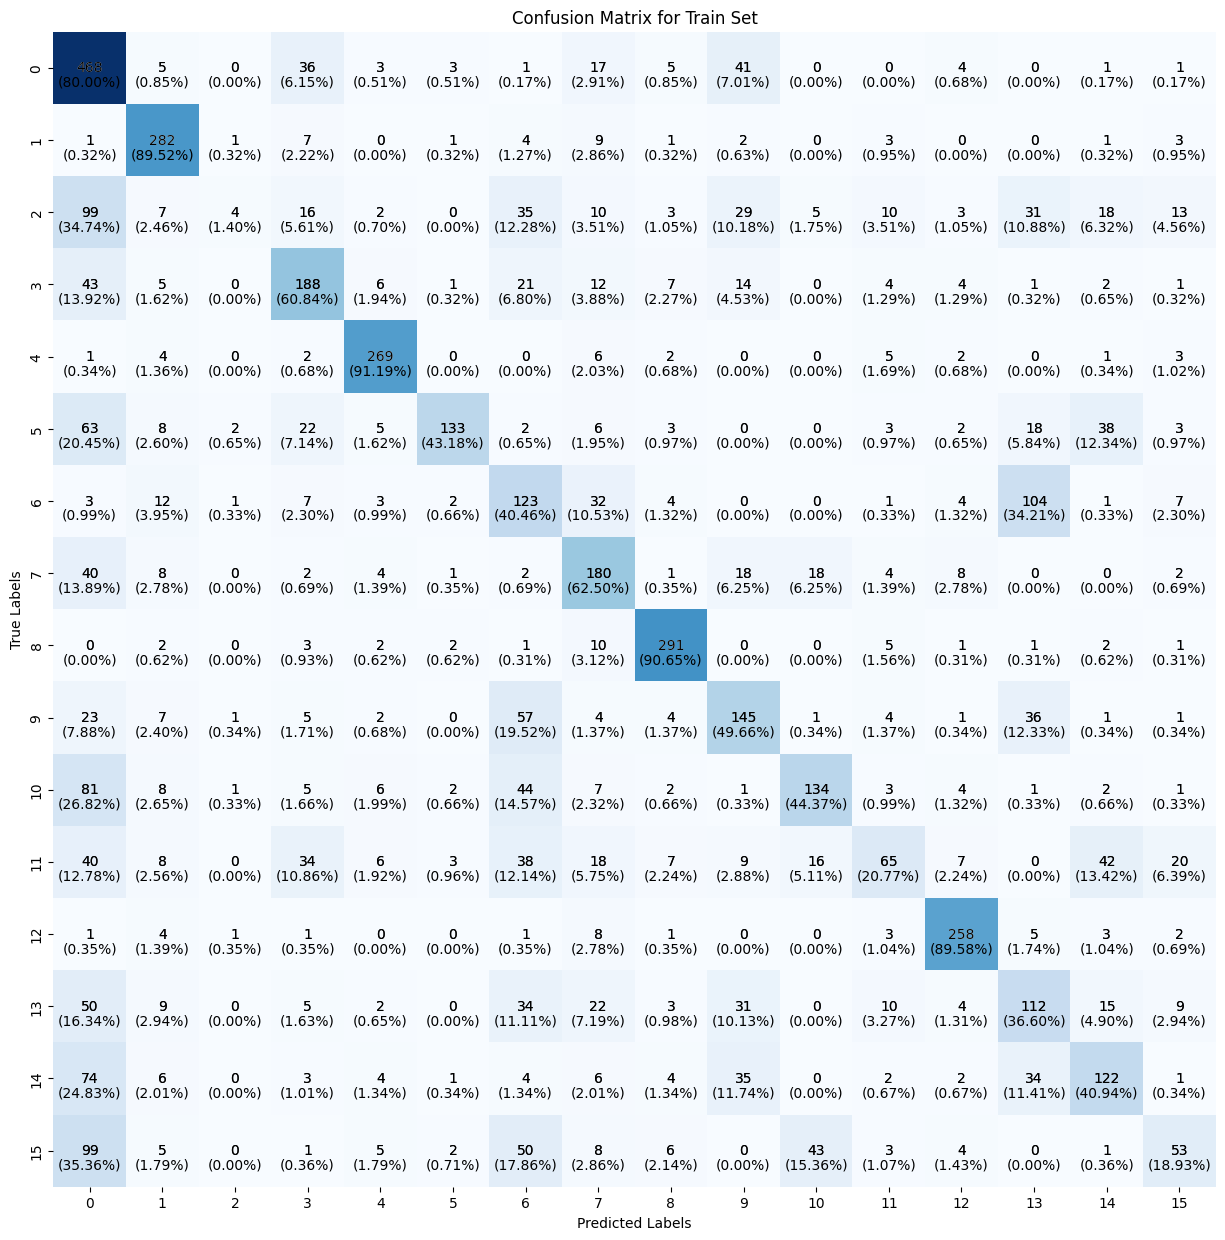

In [17]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

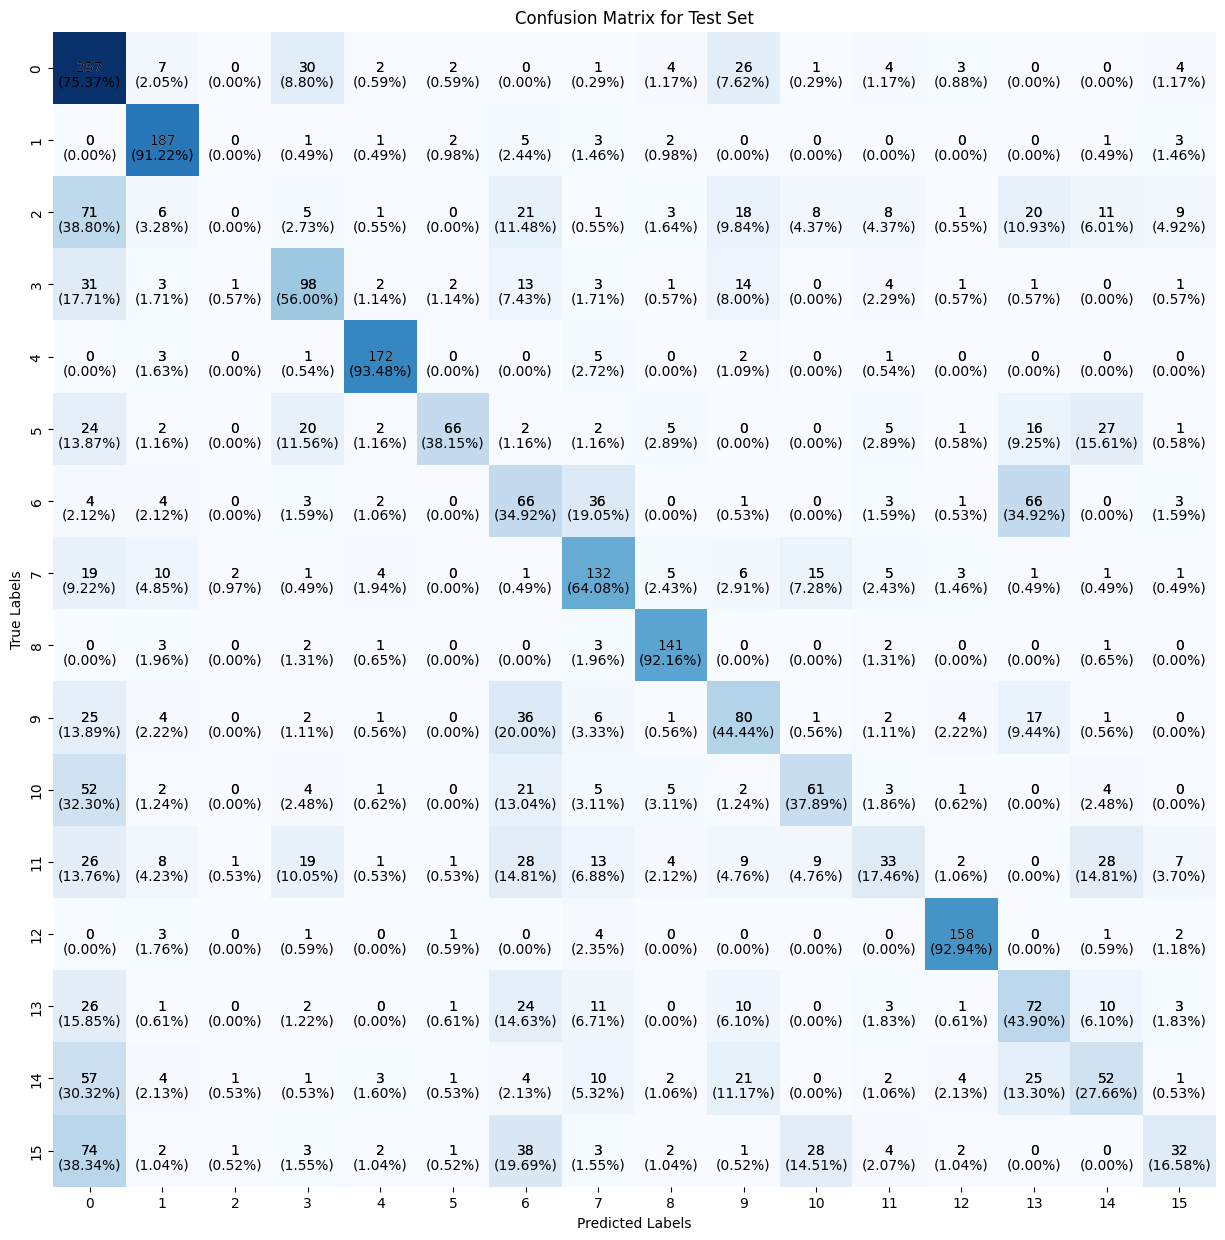

In [18]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()